# ADA 442 Machine Learning Project

# Dataset Explore

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv("bank-additional/bank-additional.csv",sep=';')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
len(df) # There are 4119 data in the dataset

4119

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

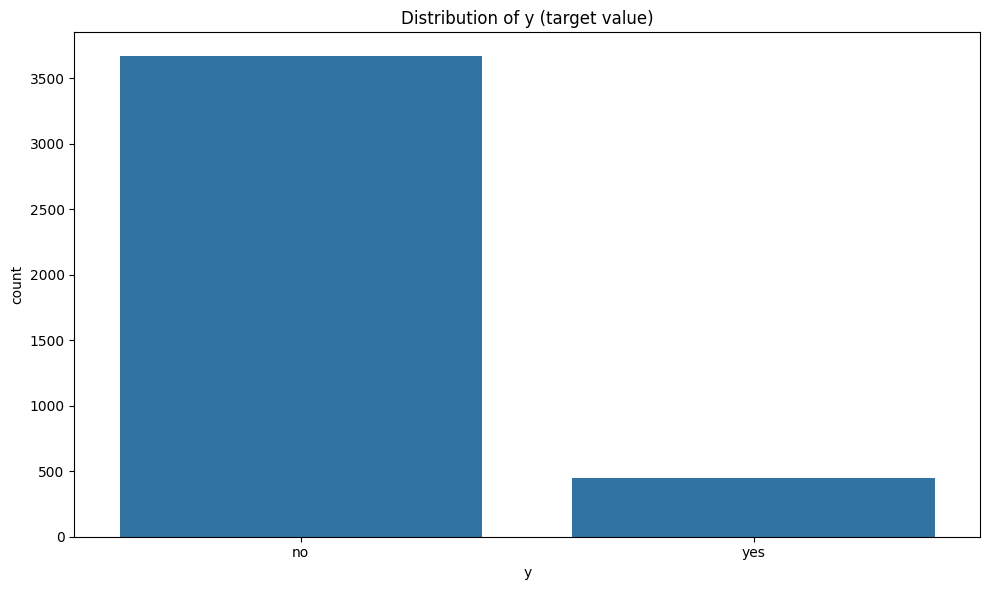

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x="y",data=df)
plt.title("Distribution of y (target value)")  # Imbalance data
plt.tight_layout()

In [12]:
df["y"].value_counts()

y
no     3668
yes     451
Name: count, dtype: int64

In [13]:
df.describe()
# Min age 18 max age 88
# Campaign, number of calls made to the customer min 1, max 35, average 2, very outlier value
# pdays has many 999s, this may mean the data is missing, it may be an unnecessary column

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


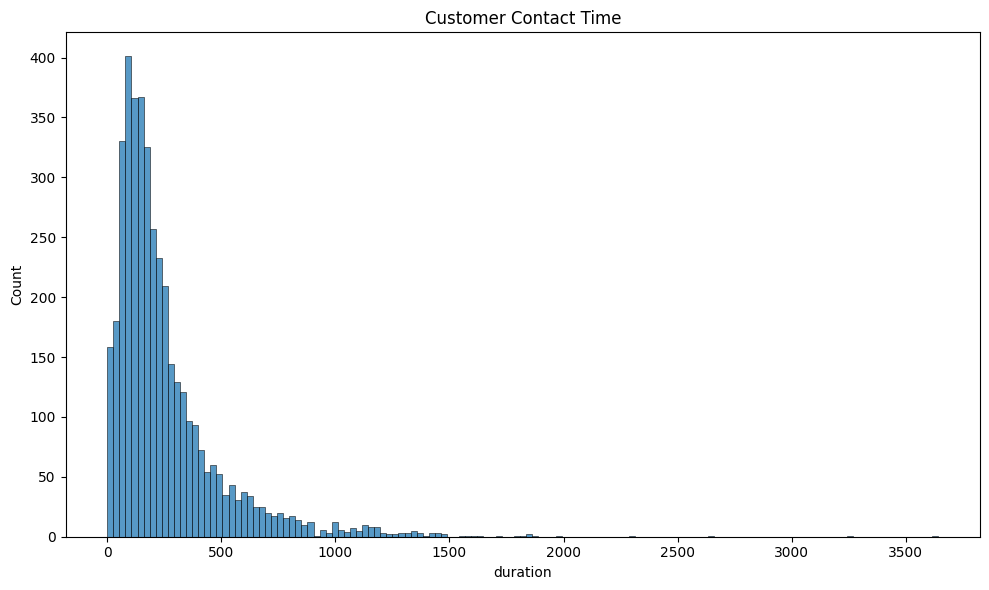

In [14]:
plt.figure(figsize=(10,6))
plt.title("Customer Contact Time")
sns.histplot(x="duration",data=df)
plt.tight_layout()

# Data Cleaning

In [15]:
# Find the missing values

In [16]:
df.isnull().sum() # no nan value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
# The missing value "unknown" exists in categorical variables.

In [18]:
df_categorical = df[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]]

In [19]:
df_categorical

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent
4116,student,single,high.school,no,no,no,cellular,may,mon,failure
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent


In [20]:
for column_name in df_categorical.columns:

    values = df_categorical[column_name].unique()
    
    if "unknown" in values:
        percentage = df_categorical[column_name].value_counts()["unknown"] * 100 / len(df)
        print(f"Column Name: {column_name.upper()}")
        print(f"Percentage: {percentage:.2f}%")   # .2f Show the percentage with two decimal places.
        print("")

    else:
        pass

Column Name: JOB
Percentage: 0.95%

Column Name: MARITAL
Percentage: 0.27%

Column Name: EDUCATION
Percentage: 4.05%

Column Name: DEFAULT
Percentage: 19.50%

Column Name: HOUSING
Percentage: 2.55%

Column Name: LOAN
Percentage: 2.55%



In [21]:
# If the missing data percentage is less than 5%, replace it with the most frequently occurring element mode()

for column_name in df_categorical.columns:

    values = df_categorical[column_name].unique()
    
    if "unknown" in values:
        percentage = df_categorical[column_name].value_counts()["unknown"] * 100 / len(df)

        if 0 < percentage < 5:
            column_mod = df[column_name].mode()[0] 
            df[column_name] = df[column_name].replace("unknown",column_mod)

    else:
        pass

In [22]:
df.drop("default", axis=1, inplace=True) # remove the default column

In [23]:
# Dealing with Outliers

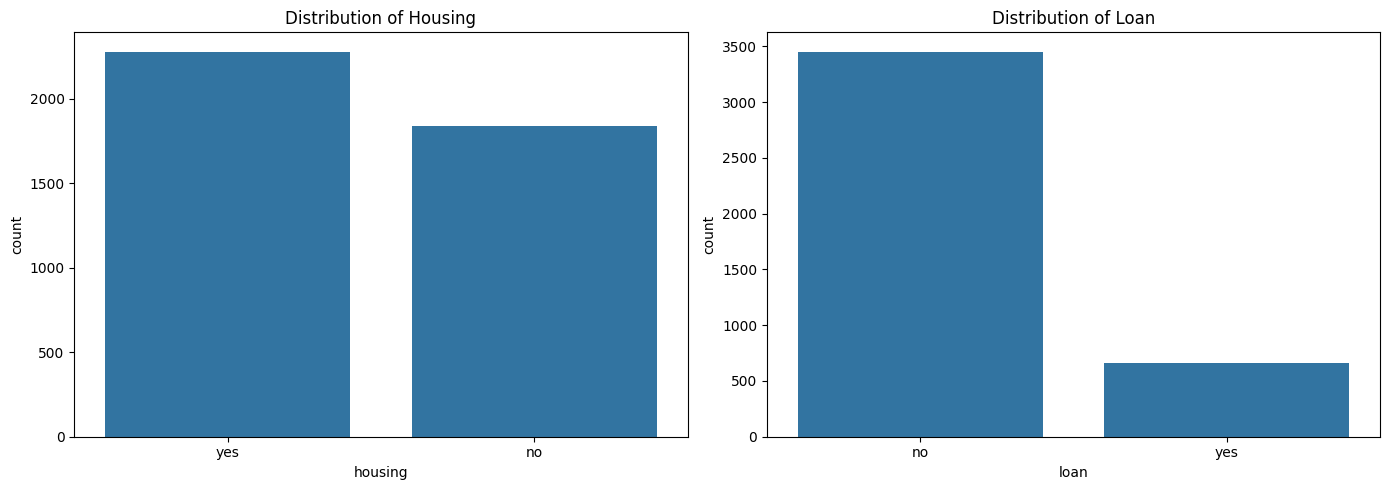

In [24]:
# How dependent is the customer on the bank? Do they have a housing? Do they have a personal loan?
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,5))

sns.countplot(x="housing",data=df, ax=axes[0])
axes[0].set_title("Distribution of Housing")

sns.countplot(x="loan",data=df, ax=axes[1])
axes[1].set_title("Distribution of Loan")

plt.tight_layout()

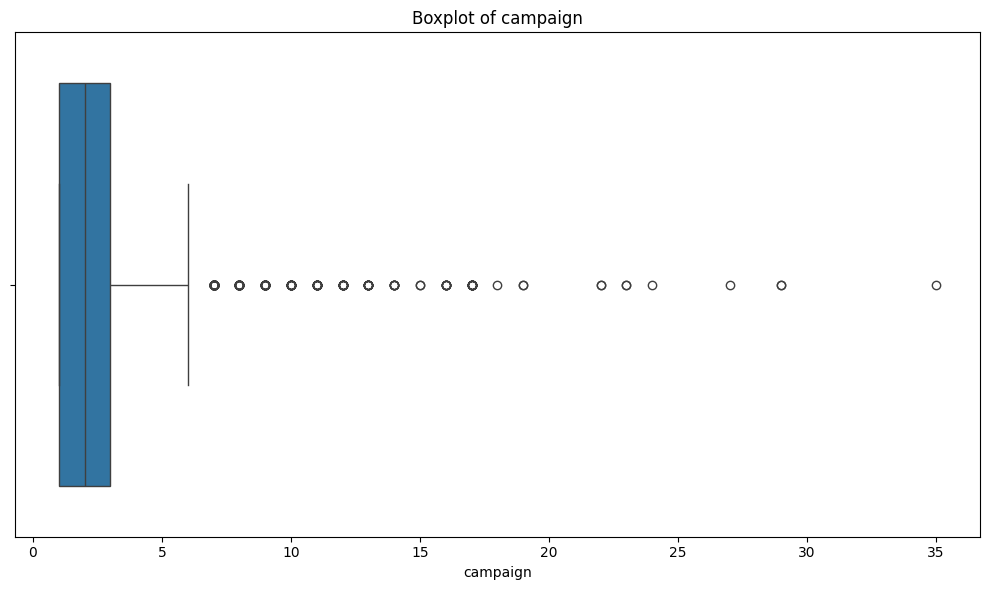

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="campaign",data=df)  # campaign → The total number of calls in this campaign
plt.title("Boxplot of campaign")

plt.tight_layout()

In [26]:
df["pdays"].value_counts() # pdays ==> Number of days elapsed

pdays
999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: count, dtype: int64

In [27]:
df["contact"].value_counts()

contact
cellular     2652
telephone    1467
Name: count, dtype: int64

In [28]:
df["education"].value_counts()

education
university.degree      1431
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
illiterate                1
Name: count, dtype: int64

In [29]:
df["marital"].value_counts()

marital
married     2520
single      1153
divorced     446
Name: count, dtype: int64

# Feature Engineering

In [30]:
df['y_encoded'] = df['y'].map({'yes': 1, 'no': 0})

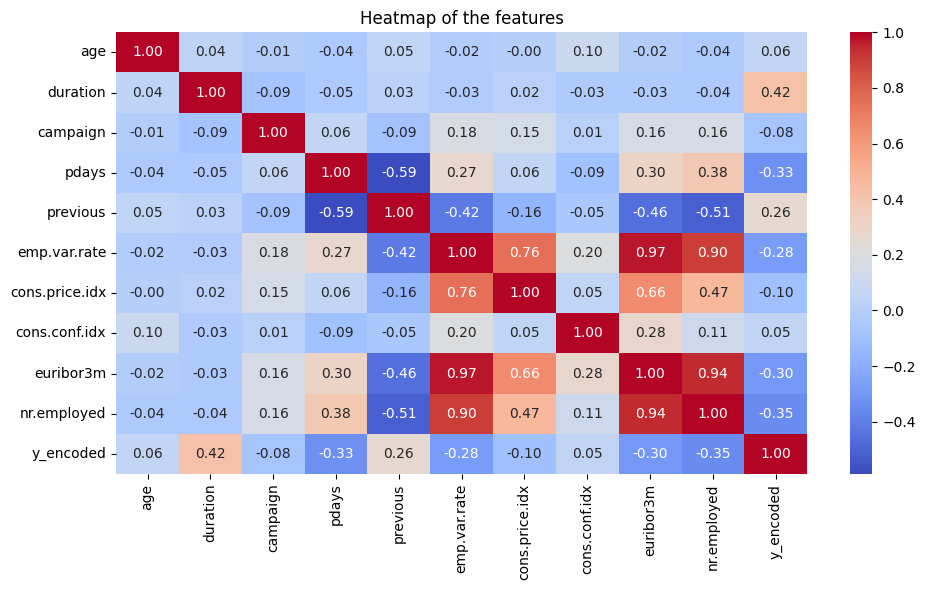

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Heatmap of the features")

plt.tight_layout()

In [32]:
# emp.var.rate <=> euribor3m (0.97)
# cons.price.idx <=> emp.var.rate (0.76)
# cons.price.idx <=> euribor3m (0.66)
# euribor3m <==> nr.employed (0.94)
# previous <=> pdays (-0.59)

In [33]:
# Age

In [34]:
print("Min age: ",df["age"].min())
print("Max age: ",df["age"].max())

Min age:  18
Max age:  88


In [35]:
df["young_age"] = np.where((df["age"] > 17) & (df["age"] <= 25),1,0)
df["adult_age"] = np.where((df["age"] > 25) & (df["age"] <= 40),1,0)
df["middle_age"] = np.where((df["age"] > 40) & (df["age"] < 55),1,0)
df["retired_age"] = np.where((df["age"] >= 55),1,0)

In [36]:
# Season

In [37]:
df["month"].value_counts()  

month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64

In [38]:
df["summer"] = np.where(
    (df["month"] == "jun") | (df["month"] == "jul") | (df["month"] == "aug"),1,0)

df["fall"] = np.where(
     (df["month"] == "sep") | (df["month"] == "oct") | (df["month"] == "nov") | (df["month"] == "dec"),1,0) # Kışı buraya aldım çünkü kış mevsimindeki 2 ay yok decemberda da çok az veri var

df["spring"] = np.where(
    (df["month"] == "mar") | (df["month"] == "apr") | (df["month"] == "may"),1,0)

In [39]:
# education

In [40]:
df["education"].value_counts()

education
university.degree      1431
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
illiterate                1
Name: count, dtype: int64

In [41]:
df["has_university_degree"] = np.where(df["education"] == "university.degree",1,0)
# df["no_university_degree"] = np.where(df["education"] != "university.degree",1,0)

In [42]:
# marital

In [43]:
df["marital"].value_counts() 

marital
married     2520
single      1153
divorced     446
Name: count, dtype: int64

In [44]:
df["married"] = np.where(df["marital"] == "married",1,0) # Married or not

In [45]:
# campaign → Bu kampanyada müşteriye yapılan arama sayısı

In [46]:
df["campaign"].value_counts()

campaign
1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
17      14
13      11
16       7
14       6
15       2
22       2
19       2
23       2
29       2
27       1
18       1
24       1
35       1
Name: count, dtype: int64

In [47]:
df['is_high_campaign'] = np.where(df['campaign'] > 3, 1, 0) # If insisted upon too much

In [48]:
# job ==> blue collar, white collar, other collars

In [49]:
df["job"].value_counts() 

job
admin.           1051
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
Name: count, dtype: int64

In [50]:
white_collar = ["admin.","technician","management"]
blue_collar = ["blue-collar","services","housemaid"]
other_collar = ["retired","self-employed","entrepreneur","unemployed","student"]

In [51]:
df["white_collar"] = np.where(df["job"].isin(white_collar),1,0)
df["blue_collar"] = np.where(df["job"].isin(blue_collar),1,0)
df["other_collar"] = np.where(df["job"].isin(other_collar),1,0)  

In [52]:
df["euribor3m"].head() # A high euribor3m means high interbank interest rates.
# This means banks can offer higher interest rates on deposit accounts. The attractiveness of deposits increases.

0    1.313
1    4.855
2    4.962
3    4.959
4    4.191
Name: euribor3m, dtype: float64

In [53]:
df["emp.var.rate"].head() # Indicates the overall health of the economy, growth rate, and unemployment risk. 
# + indicates a good economy,
# - indicates a bad economy.

0   -1.8
1    1.1
2    1.4
3    1.4
4   -0.1
Name: emp.var.rate, dtype: float64

In [54]:
df["econ_interact"] = df["euribor3m"] * df["emp.var.rate"] # Interest rates are high, and in this economic climate, a good customer might accept a deposit.

In [55]:
# Age and Interest Rate Interaction: Sensitivity to interest rates changes as age increases.
df["age_euribor_interact"] = df["age"] * df["euribor3m"]

# df["y_age_euribor_interact"] = df["young_age"] * df["euribor3m"]
df["a_age_euribor_interact"] = df["adult_age"] * df["euribor3m"]
df["m_age_euribor_interact"] = df["middle_age"] * df["euribor3m"]
df["r_age_euribor_interact"] = df["retired_age"] * df["euribor3m"]

In [56]:
# Campaign Success and Economic Confidence
# High call volumes can backfire if people lack confidence in the economy
df["campaign_conf_interact"] = df["campaign"] * df["cons.conf.idx"]

In [57]:
# cons.price.idx → Inflation

In [58]:
df["cpi_euribor_diff"] = df["cons.price.idx"] - df["euribor3m"]

In [59]:
df["pdays"].value_counts() # 999 or not

pdays
999    3959
3        52
6        42
4        14
7        10
10        8
12        5
5         4
2         4
1         3
9         3
16        2
13        2
18        2
0         2
15        2
19        1
17        1
11        1
21        1
14        1
Name: count, dtype: int64

In [60]:
df["previous_contact"] = np.where(df["pdays"] == 999, 0, 1)

In [61]:
# housing → Do you offer housing loans? 
# loan → Do you offer personal loans?

In [62]:
df["has_multiple_loans"] = np.where(
    (df["housing"] == "yes") & (df["loan"] == "yes"), 
    1,                                                
    0                                                
)
# The reason we multiply these two here is that if a customer is taking out both a mortgage and a personal loan, 
# they are going through a difficult period, so they wouldn't take out a deposit.

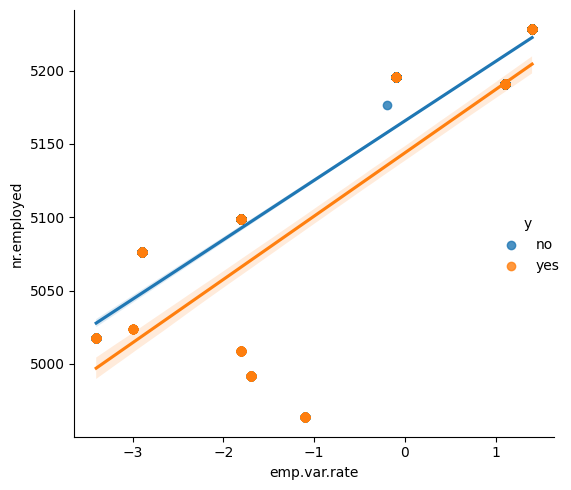

In [63]:
sns.lmplot(x="emp.var.rate",y="nr.employed",data=df,hue="y")
plt.tight_layout()

# This graph shows that as employment conditions worsen, customers are more likely to turn to term deposits.

In [64]:
# Marking situations where the economy is contracting (negative zone)
df['economic_stress'] = (df['emp.var.rate'] < 0).astype(int)

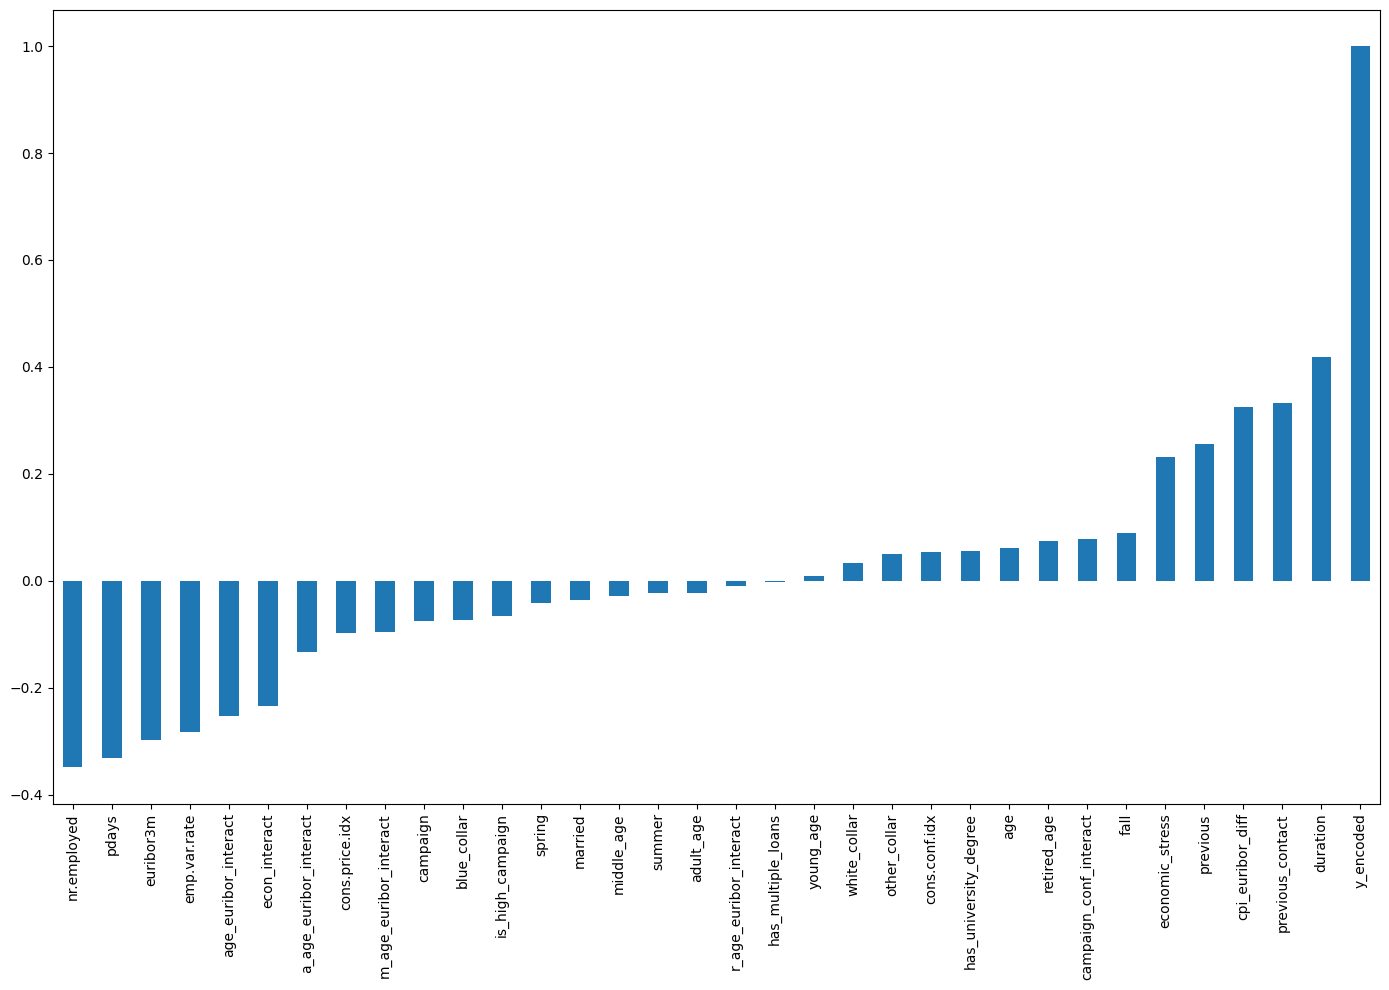

In [65]:
plt.figure(figsize=(14,10))
df.corr(numeric_only=True)["y_encoded"].sort_values().plot(kind="bar")

plt.tight_layout()

# Data Preprocessing

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [67]:
# Hyperparameter tuning is the step that takes a model's performance from "improving" to "perfecting" it.

In [68]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'y_encoded', 'young_age', 'adult_age',
       'middle_age', 'retired_age', 'summer', 'fall', 'spring',
       'has_university_degree', 'married', 'is_high_campaign', 'white_collar',
       'blue_collar', 'other_collar', 'econ_interact', 'age_euribor_interact',
       'a_age_euribor_interact', 'm_age_euribor_interact',
       'r_age_euribor_interact', 'campaign_conf_interact', 'cpi_euribor_diff',
       'previous_contact', 'has_multiple_loans', 'economic_stress'],
      dtype='object')

In [69]:
X = df.drop(["y","y_encoded","duration",'young_age','adult_age', 'middle_age', 'retired_age'],axis=1) #  
y = df["y"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [71]:
print("Shape of the X_train: ",X_train.shape)
print("Shape of the X_test: ",X_test.shape)
print("Shape of the y_train: ",y_train.shape)
print("Shape of the y_test: ",y_test.shape)

Shape of the X_train:  (2883, 37)
Shape of the X_test:  (1236, 37)
Shape of the y_train:  (2883,)
Shape of the y_test:  (1236,)


In [72]:
le = LabelEncoder()
y_train = le.fit_transform(y_train) # Fit and transform with training set 
y_test = le.transform(y_test)       

In [73]:
categorical_df = X_train.select_dtypes(include=['object', 'category'])
numerical_df = X_train.select_dtypes(include=['number'])

In [74]:
categorical_df.columns # All categorical features in the dataset

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome'],
      dtype='object')

In [75]:
numerical_df.columns  # All numerical features in the dataset

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'summer',
       'fall', 'spring', 'has_university_degree', 'married',
       'is_high_campaign', 'white_collar', 'blue_collar', 'other_collar',
       'econ_interact', 'age_euribor_interact', 'a_age_euribor_interact',
       'm_age_euribor_interact', 'r_age_euribor_interact',
       'campaign_conf_interact', 'cpi_euribor_diff', 'previous_contact',
       'has_multiple_loans', 'economic_stress'],
      dtype='object')

# Create the Pipeline

In [76]:
# The purpose of Pipeline:
# To gather all preprocessing + modeling steps under a single structure, instead of writing each step individually.

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [78]:
categorical_features = ['education', 'housing', 'loan', 'contact', 'month',
       'poutcome']

numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'has_university_degree', 'married', 'is_high_campaign', 'white_collar',
       'blue_collar', 'other_collar', 'econ_interact', 'age_euribor_interact',
       'a_age_euribor_interact', 'm_age_euribor_interact',
       'r_age_euribor_interact', 'campaign_conf_interact', 'cpi_euribor_diff',
       'previous_contact', 'has_multiple_loans', 'economic_stress']

In [79]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())                   # Scale with Standard Scaler mean = 0, std = 1 
])
# In here we haven't actually carried out the process yet; we're just describing what needs to be done.

In [80]:
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   # One hot encoding, 1 and 0
])

In [81]:
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [82]:
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [83]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),  # When data arrives: it should pass through numerical_features → num_pipeline
        ('cat', cat_pipeline, categorical_features) # # When data arrives: it should pass through categorical_features → cat_pipeline’dan geçsin
    ]
)  
# Finally, combine them all under the name preprocessor

# preprocessor:
# - Did NOT process the data! 
# - Described how to process the data

In [84]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'campaign', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m', 'nr.employed',
                                  'has_university_degree', 'married',
                                  'is_high_campaign', 'white_collar',
                                  'blue_collar', 'other_collar',
                                  'econ_intera...
                                  'a_age_euribor_interact',
                                  'm_age_euribor_interact',
                                  'r_age_euribor_interact',
                                  'campaign_conf_interact', 'cpi_euribor_diff',
                                  'previous_contact', 'has_multiple_loans',
                                  'economic_stress']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['education', 'housing', 'loan', 'contact',
                                  'month', 'poutcome'])])

In [85]:
# Oversampling

In [86]:
df["y"].value_counts() # Imbalance data

y
no     3668
yes     451
Name: count, dtype: int64

# Model Selection

In [87]:
# Linear Regression
# Random Forest
# XGBoust

# 1) Logistic Regression

In [88]:
from imblearn.pipeline import Pipeline  #sklearn.pipeline doesn't support SMOTE, so I used imblearn.pipeline.
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('smote', SMOTE(random_state=42,sampling_strategy=0.50)), # "Generate artificial data until the minority class numbers 55% of the majority class numbers."
    ('model', LogisticRegression(max_iter=1000))
])

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

param_grid = {
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
    
    # Tune the SMOTE parameters
    'smote__k_neighbors': [3, 5, 7], # When generating synthetic data, should I look at the 3 closest neighbors or the 7 closest neighbors?
    
    # Tune the (Logistic Regression) parameters
    'model__C': [0.1, 1, 10],  # A lower C applies a stronger penalty, keeping the model coefficients low.
    'model__solver': ['liblinear', 'lbfgs']
}

# Wrapping the Pipeline with GridSearchCV
grid_search = GridSearchCV(
    full_pipeline, 
    param_grid, 
    cv=5,                      # It divides the data into 5 parts, trains with 4 of them and tests with 1, and repeats this process 5 times.
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train) # training start

print("Best parameters:", grid_search.best_params_)
print("Best score (F1):", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'model__C': 10, 'model__solver': 'lbfgs', 'preprocessor__num__scaler': StandardScaler(), 'smote__k_neighbors': 5}
Best score (F1): 0.47381748487623365


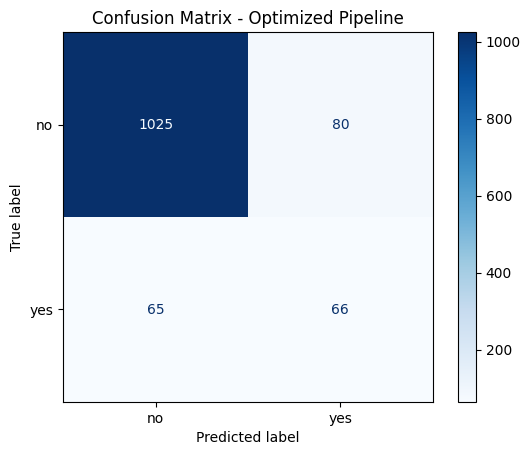

              precision    recall  f1-score   support

          no       0.94      0.93      0.93      1105
         yes       0.45      0.50      0.48       131

    accuracy                           0.88      1236
   macro avg       0.70      0.72      0.71      1236
weighted avg       0.89      0.88      0.89      1236



In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Optimized Pipeline')
plt.show()

# 4. Detailed Report (Precision, Recall, F1)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 2) Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [92]:
num_pipeline = Pipeline(steps=[        # Removed the scaler from the digital pipeline.
    ('imputer', SimpleImputer(strategy='median')) 
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features)
    ]
)

In [93]:
full_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [94]:
param_grid_rf = {
    'smote__sampling_strategy': [0.5, 0.75],
    'smote__k_neighbors': [3, 5],
    
    # Model Parametreleri
    'model__n_estimators': [100, 200],      # Total tree in the forest
    'model__max_depth': [5, 7, 8],          # How deep the trees can go (Prevents overfitting)
    'model__min_samples_split': [2, 5, 10], # Minimum number of samples required to divide a branch
     "model__min_samples_leaf": [5, 10]
}

# 3. GridSearchCV with pipeline
grid_search_rf = GridSearchCV(
    full_pipeline_rf, 
    param_grid_rf, 
    cv=5, 
    scoring='f1', # Maximize the F1 score
    n_jobs=-1,
    verbose=1
)

# Start to training
grid_search_rf.fit(X_train, y_train)

# Results
print("Best parameters:", grid_search_rf.best_params_)
print("Best F1 score:", grid_search_rf.best_score_)

# Choose the best model for testing
best_rf_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


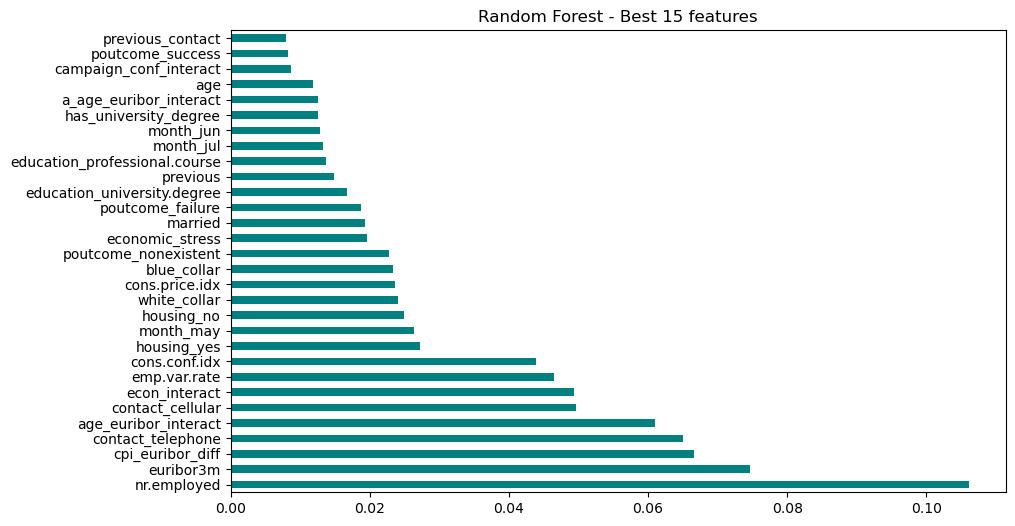

In [ ]:
model = best_rf_model.named_steps['model']

ohe_cols = list(best_rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features))
all_features = numerical_features + ohe_cols

feat_importances = pd.Series(model.feature_importances_, index=all_features)

# The Most important 15 features
plt.figure(figsize=(10,6))
feat_importances.nlargest(30).plot(kind='barh', color='teal')
plt.title("Random Forest - Best 15 features")
plt.show()

# 3) XGBoost

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [ ]:
# Remove the scaler
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')) 
])

# Same encoded
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numerical_features),
        ('cat', cat_pipeline, categorical_features)
    ]
)

In [ ]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 8.009375


In [ ]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

param_grid = {
    'model__n_estimators': [200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=full_pipeline,
    param_grid=param_grid,
    cv=7,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)
best_pipeline = grid_search.best_estimator_
grid_search.best_score_

print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Fitting 7 folds for each of 48 candidates, totalling 336 fits


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = best_pipeline.predict(X_test)
y_proba = best_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1105
           1       0.36      0.59      0.45       131

    accuracy                           0.84      1236
   macro avg       0.65      0.73      0.68      1236
weighted avg       0.88      0.84      0.86      1236

Test ROC AUC: 0.756239853545646


In [ ]:
import pickle

# Best RF pipeline
best_rf_pipeline = grid_search_rf.best_estimator_

with open("rf_pipeline.sav", "wb") as f:
    pickle.dump(best_rf_pipeline, f)

print("Random Forest pipeline saved successfully")
